# Base de dados de tipos de ocorrência

#### Base contém informação relativa aos tipos de ocorrência

## Importando pacotes e bases de dados

In [64]:
#Importando pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random# Base de dados de aeronaves#### Base contém informação relativa à aeronaves envolvidas nas ocorrências

In [188]:
#verificando o tipo de encoding
import chardet
with open("ocorrencia_tipo.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [189]:
#Importando a base de dados
df_ocorrencia_tipo= pd.read_csv("ocorrencia_tipo.csv", sep = ';', encoding='ISO-8859-1')
#Importando a base de dados
df_ocorrencia = pd.read_csv("ocorrencia_pos.csv", sep = ',')
df_ocorrencia_fator = pd.read_csv("ocorrencia_fator.csv", sep = ',')
df_oco_fator_av = pd.read_csv("oco_fator_av.csv", sep = ',')

In [190]:
#removendo atributos não importantes
df_ocorrencia_tipo = df_ocorrencia_tipo.drop(['ocorrencia_tipo_categoria','taxonomia_tipo_icao'],axis=1)

## Exploração inicial da base

In [197]:
df_ocorrencia_tipo

,codigo_ocorrencia1,ocorrencia_tipo
0,39115,PANE SECA
1,39155,VAZAMENTO DE COMBUSTÍVEL
2,39156,FOGO EM VOO
3,39158,SUPERAQUECIMENTO
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
...,...,...
5312,79117,INDETERMINADO
5313,79119,INDETERMINADO
5314,79123,INDETERMINADO
5315,79203,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


In [191]:
print(df_ocorrencia_tipo['ocorrencia_tipo'].unique())
print(len(df_ocorrencia_tipo['ocorrencia_tipo'].unique()))

['PANE SECA' 'VAZAMENTO DE COMBUSTÍVEL' 'FOGO EM VOO' 'SUPERAQUECIMENTO'
 'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE'
 'PERDA DE CONTROLE EM VOO' 'OUTROS' 'POUSO ANTES DA PISTA' 'POUSO BRUSCO'
 'FALHA DO MOTOR EM VOO' 'COLISÃO COM AVE' 'PERDA DE CONTROLE NO SOLO'
 'POUSO SEM TREM' 'OPERAÇÃO A BAIXA ALTITUDE' 'F.O.D.' 'COM TREM DE POUSO'
 'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO'
 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO' 'ESTOURO DE PNEU'
 'COLISÃO COM OBSTÁCULOS NO SOLO' 'COM PARA-BRISAS / JANELA / PORTA'
 'PROBLEMAS FISIOLÓGICOS' 'EXCURSÃO DE PISTA' 'POUSO LONGO'
 'TRÁFEGO AÉREO' 'FALHA DO MOTOR NO SOLO' 'POUSO EM LOCAL NÃO PREVISTO'
 'VAZAMENTO DE OUTROS FLUIDOS' 'FOGO NO SOLO' 'INDETERMINADO'
 'PERDA DE COMPONENTE NO SOLO' 'DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA'
 'SOPRO DE REATOR' 'PERDA DE COMPONENTE EM VOO' 'COM COMANDOS DE VOO'
 'VOO CONTROLADO CONTRA O TERRENO' 'AERONAVE ATINGIDA POR OBJETO'
 'ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO'
 'COLISÃO COM A

In [192]:
#Selecionando apenas os 10 principais tipo e agrupamanto considerando a contagem
tipo_ocorrencia = df_ocorrencia_tipo.groupby(['ocorrencia_tipo']).count().sort_values('codigo_ocorrencia1',ascending=False)[:10].reset_index()

In [193]:
tipo_ocorrencia

,ocorrencia_tipo,codigo_ocorrencia1
0,FALHA DO MOTOR EM VOO,633
1,ESTOURO DE PNEU,568
2,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,540
3,PERDA DE CONTROLE NO SOLO,434
4,PERDA DE CONTROLE EM VOO,333
5,OUTROS,316
6,COM TREM DE POUSO,300
7,COLISÃO COM AVE,271
8,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,168
9,TRÁFEGO AÉREO,120


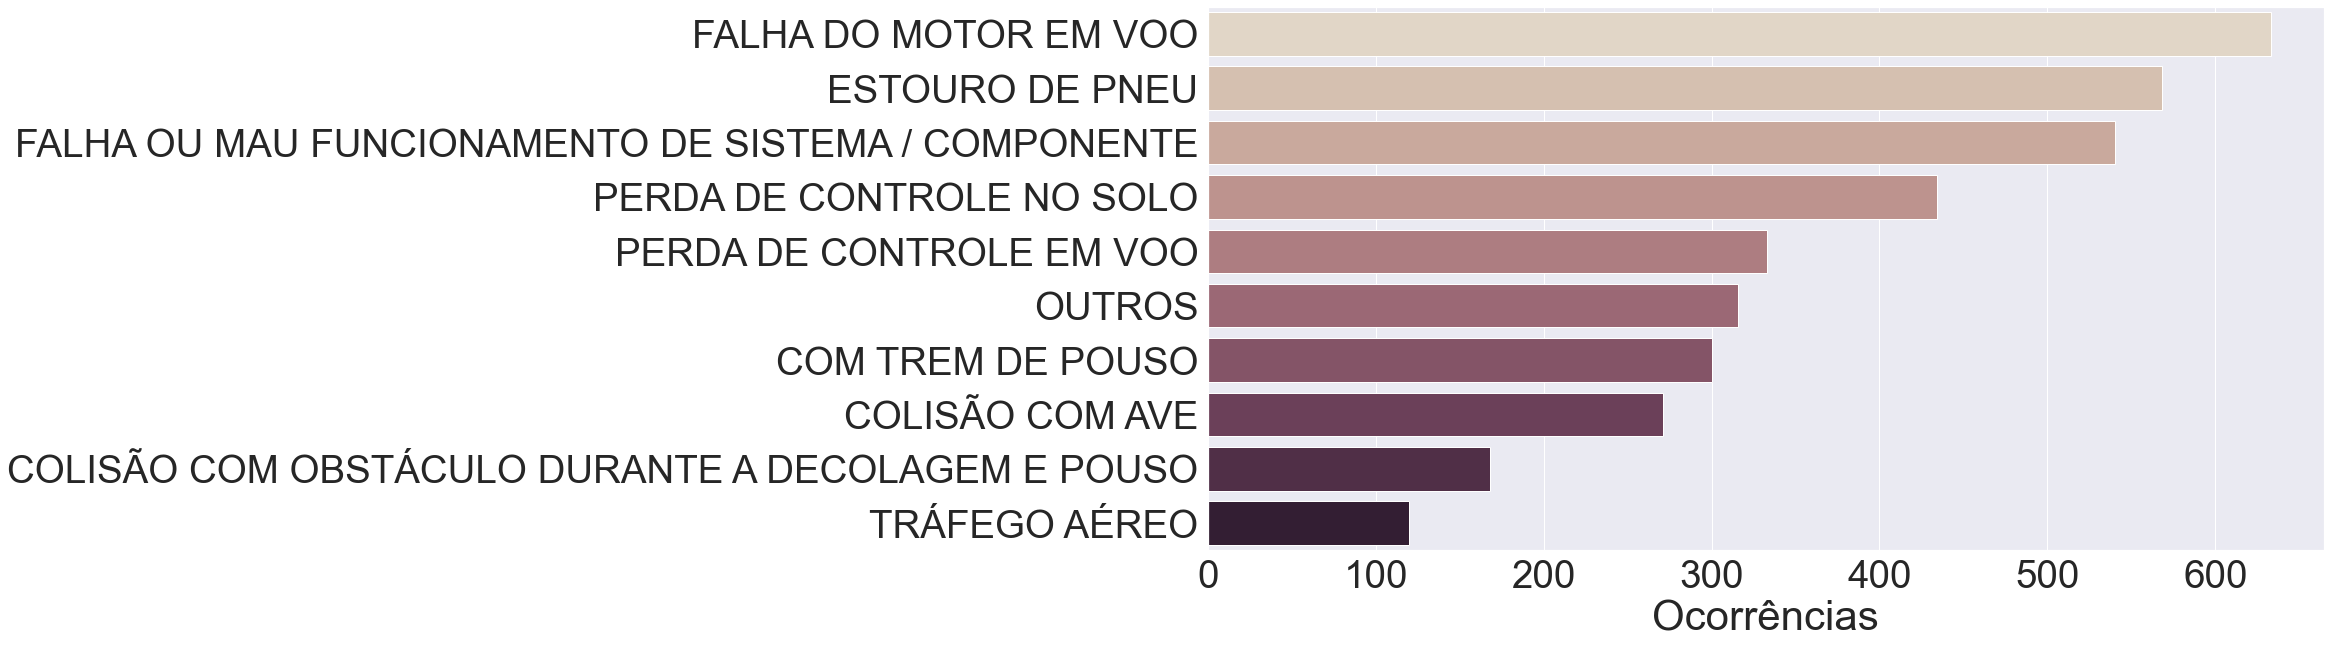

In [196]:
#Distribuição dos tipos de ocorrência
sns.set(font_scale = 3.5)
sns_plot = sns.barplot(x="codigo_ocorrencia1", y="ocorrencia_tipo", data=tipo_ocorrencia, palette="ch:.25")
sns_plot.figure.set_size_inches(20, 10)
sns_plot.set_ylabel("")
sns_plot.set_xlabel("Ocorrências")
sns_plot.figure.savefig("ocorrencia_tipo_tipo.png", bbox_inches = 'tight')

In [85]:
df_ocorrencia_tipo

,codigo_ocorrencia1,ocorrencia_tipo
0,39115,PANE SECA
1,39155,VAZAMENTO DE COMBUSTÍVEL
2,39156,FOGO EM VOO
3,39158,SUPERAQUECIMENTO
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
...,...,...
5312,79117,INDETERMINADO
5313,79119,INDETERMINADO
5314,79123,INDETERMINADO
5315,79203,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


## Modelo de Classificação para prever dano

### Unindo as bases de dados e selecioando atributos

In [243]:
df_juntos = df_oco_fator_av.merge(df_ocorrencia_tipo)

In [246]:
print(len(df_juntos.columns))
df_juntos.columns

51


Index(['Unnamed: 0', 'Unnamed: 0.1', 'codigo_ocorrencia', 'codigo_ocorrencia1',
       'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4',
       'ocorrencia_classificacao', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia',
       'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'ano', 'fator_nome', 'total_fatores',
       'fator_humano', 'fator_operacional', 'fator_material',
       'fator_metereologico', 'fator_outro', 'aeronave_operador_categoria',
       'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo',
       'aeronave_tipo_icao', 'aeronave_motor_tipo',
       'aeronave_motor_quantidade', 'aeronave_assentos',
       'a

In [247]:
#removendo atributos que não irão contribuir para a classificação
df_juntos = df_juntos.drop(['Unnamed: 0', 'Unnamed: 0.1', 'codigo_ocorrencia', 'codigo_ocorrencia1',
       'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'],axis=1)
df_juntos = df_juntos.drop(['ocorrencia_pais','ocorrencia_dia','ocorrencia_hora','investigacao_aeronave_liberada',
               'aeronave_pais_fabricante','aeronave_pais_registro'],axis=1)
df_juntos = df_juntos.drop(['divulgacao_relatorio_numero','ocorrencia_aerodromo','divulgacao_dia_publicacao',
               'aeronave_voo_origem','aeronave_voo_destino'],axis=1)
df_juntos = df_juntos.drop(['ocorrencia_cidade','ocorrencia_uf'],axis=1)
df_juntos = df_juntos.drop(['aeronave_fabricante','aeronave_modelo','aeronave_tipo_icao',
                           'aeronave_registro_segmento'],axis=1)
df_juntos= df_juntos.drop(['fator_nome','divulgacao_relatorio_publicado','investigacao_status'],axis=1)
df_juntos = df_juntos.drop(['ocorrencia_classificacao','ocorrencia_latitude','ocorrencia_longitude'],axis=1)
df_juntos = df_juntos.drop(['aeronave_operador_categoria'],axis=1)

In [248]:
#atributos que restaram
print(len(df_juntos.columns))
df_juntos.columns

20


Index(['total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'ano', 'total_fatores', 'fator_humano',
       'fator_operacional', 'fator_material', 'fator_metereologico',
       'fator_outro', 'aeronave_tipo_veiculo', 'aeronave_motor_tipo',
       'aeronave_motor_quantidade', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total', 'ocorrencia_tipo'],
      dtype='object')

In [214]:
#removendo valores faltantes
for atributo in df_juntos.columns:
    df_juntos = df_juntos[df_juntos[atributo]!='***'].dropna()

In [215]:
#a classe que será prevista é o atributo 'aeronave_nivel_dano'
classes = df_juntos['aeronave_nivel_dano'].unique()

### Colocando a base no formato adequado para a classificação

In [216]:
#função que transforma atributos categóricos em numéricos
def categorical_to_numerical(df):
    categorical_list = []
    numerical_list = []
    for column in df.columns:
        if df[column].describe().dtype == 'O':
            categorical_list.append(column)
        else:
            numerical_list.append(column)

    categorical_dic = {}
    for att in categorical_list:
        categorical_dic[att] = {}
        key = 0
        for data in df[att].unique():
            categorical_dic[att][data] = key
            key += 1

    for att in categorical_list:
        df[att] = df[att].apply(lambda x: categorical_dic[att][x])
    return categorical_dic

In [217]:
dic = categorical_to_numerical(df_juntos)
print(dic)
df_juntos

{'ocorrencia_saida_pista': {'NÃO': 0, 'SIM': 1}, 'aeronave_tipo_veiculo': {'AVIÃO': 0, 'HELICÓPTERO': 1, 'PLANADOR': 2, 'ANFÍBIO': 3, 'ULTRALEVE': 4}, 'aeronave_motor_tipo': {'PISTÃO': 0, 'TURBOÉLICE': 1, 'TURBOEIXO': 2, 'JATO': 3, 'SEM TRAÇÃO': 4}, 'aeronave_motor_quantidade': {'MONOMOTOR': 0, 'BIMOTOR': 1, 'SEM TRAÇÃO': 2, 'TRIMOTOR': 3}, 'aeronave_fase_operacao': {'DECOLAGEM': 0, 'ARREMETIDA NO AR': 1, 'CRUZEIRO': 2, 'POUSO': 3, 'DESCIDA': 4, 'SUBIDA': 5, 'ESPECIALIZADA': 6, 'OUTRA FASE': 7, 'VOO A BAIXA ALTURA': 8, 'CORRIDA APÓS POUSO': 9, 'PARTIDA DO MOTOR': 10, 'APROXIMAÇÃO FINAL': 11, 'MANOBRA': 12, 'RETA FINAL': 13, 'PAIRADO': 14, 'TÁXI': 15, 'CIRCUITO DE TRÁFEGO': 16, 'ARREMETIDA NO SOLO': 17, 'OPERAÇÃO DE SOLO': 18, 'INDETERMINADA': 19, 'ESTACIONAMENTO': 20, 'DECOLAGEM VERTICAL': 21, 'PROCEDIMENTO DE APROXIMAÇÃO IFR': 22}, 'aeronave_tipo_operacao': {'PRIVADA': 0, 'REGULAR': 1, 'AGRÍCOLA': 2, 'INSTRUÇÃO': 3, 'TÁXI AÉREO': 4, 'ESPECIALIZADA': 5, 'NÃO REGULAR': 6, 'POLICIAL': 7,

,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ano,total_fatores,fator_humano,fator_operacional,fator_material,fator_metereologico,fator_outro,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo
0,2,1,0,2010,6,2,4,0,0,0,0,0,0,4.0,1979.0,0,0,0,0,0
1,2,1,0,2010,3,0,3,0,0,0,0,1,1,73.0,2008.0,1,1,1,0,1
2,3,1,0,2010,2,0,2,0,0,0,0,0,0,1.0,1976.0,0,2,2,1,2
3,3,1,0,2010,13,7,6,0,0,0,1,2,0,6.0,1994.0,2,0,2,1,3
5,2,1,0,2010,6,0,5,0,1,0,0,0,0,2.0,1992.0,3,3,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,1,1,0,2019,2,0,2,0,0,0,1,0,0,4.0,2009.0,12,2,0,0,7
992,1,1,0,2019,2,0,2,0,0,0,0,0,0,4.0,1977.0,3,0,0,0,20
993,0,1,0,2019,1,0,0,0,0,1,4,0,0,2.0,2011.0,5,8,0,0,5
994,0,1,1,2019,3,0,3,0,0,0,0,1,0,1.0,1998.0,3,2,0,0,50


In [218]:
X = df_juntos.drop(['aeronave_nivel_dano'],axis=1)
y = df_juntos['aeronave_nivel_dano']

### Treinamento dos modelos de classificação e processo de validação cruzada

In [235]:
#Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.1, random_state=42, stratify=y)

K_VALUE = 10
seed = 7
stratifiedKfold = StratifiedKFold(n_splits=K_VALUE, random_state=seed, shuffle=True)

clf_list = []
depth_list = []

for i in range(1,30):
  clf = DecisionTreeClassifier(max_depth=i)
  clf_list.append(clf)
  depth_list.append(i)

scores_list = []
time_list = []
for clf in clf_list:
  inicio = time.time()
  scores = cross_val_score(clf, X_train, y_train, cv=stratifiedKfold)
  scores_list.append(scores)
  fim = time.time()
  time_list.append(fim - inicio)

scores_list = np.array(scores_list)
mean_scores = scores_list.mean(axis=1)

clf_best = clf_list[mean_scores.argmax()]

clf_best.fit(X_train, y_train)
score = clf_best.score(X_test, y_test)

In [236]:
score

0.7346938775510204

In [220]:
mean_scores

array([0.71670585, 0.72580982, 0.7257837 , 0.71329676, 0.70761494,
       0.68373824, 0.68146552, 0.65414054, 0.66324451, 0.64619906,
       0.62911442, 0.62344566, 0.59956897, 0.59497126, 0.59724399,
       0.58478318, 0.58588036, 0.59042581, 0.57339342, 0.59728318,
       0.57791275, 0.58928945, 0.58701672, 0.58932863, 0.58244514,
       0.58475705, 0.59153605, 0.5869906 , 0.58928945])

In [227]:
#Gera a árvore de decisão
!pip install graphviz
import graphviz 
clf_list[2].fit(X_train, y_train)
print(clf_list[2].score(X_test, y_test))
dot_data = tree.export_graphviz(clf_list[2], out_file=None,feature_names=X.columns, 
                                class_names=classes, filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("dano") 

0.7346938775510204


'dano.pdf'

In [240]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.1, random_state=42, stratify=y)

K_VALUE = 10
seed = 7
stratifiedKfold = StratifiedKFold(n_splits=K_VALUE, random_state=seed, shuffle=True)

clf = RandomForestClassifier()
clf_list = []
depth_list = []

for i in range(1,20):
  clf = RandomForestClassifier(max_depth=i)
  clf_list.append(clf)
  depth_list.append(i)

scores_list = []
time_list = []
for clf in clf_list:
  inicio = time.time()
  scores = cross_val_score(clf, X_train, y_train, cv=stratifiedKfold)
  scores_list.append(scores)
  fim = time.time()
  time_list.append(fim - inicio)

scores_list = np.array(scores_list)
mean_scores = scores_list.mean(axis=1)

clf_best = clf_list[mean_scores.argmax()]

clf_best.fit(X_train, y_train)
score = clf_best.score(X_test, y_test)

In [241]:
mean_scores

array([0.65642633, 0.66324451, 0.69281609, 0.71102403, 0.72924504,
       0.72580982, 0.72809561, 0.72923197, 0.72234848, 0.73487461,
       0.73942006, 0.73265413, 0.73949843, 0.74062173, 0.73722571,
       0.73488767, 0.74516719, 0.74627743, 0.73834901])

In [242]:
score

0.7857142857142857